# Feature scaling _ standardization

In [62]:
# feature scaling is a part of feature engineering -in feature engineering using domain knowledge or sometime intution,
#we extract some features from raw data, extracting is referred as creating new features, by transforming or combining two or more features.
#These features are further used to improve the perforamnce of machine learning algorithms, or overall model performance

In [63]:
#feature scaling is a technique to scale the independent features in the data in a fixed range.
#technique1 - standardization also called z-score normalization.

In [64]:
# working of standardization

![text](standardizaion_nb.jpg)

In [65]:
#import libraries

In [85]:
import numpy as np # linear algebra
import pandas as pd # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns

In [67]:
# import dataset,here we're using advertisement data having columns userid(not important), gender(categorical),
# age(numerical-[range 0-100] we'll do scaling on age), estimated salary([range 10k - somelacs]numerical - scaling needed)

In [86]:
df = pd.read_csv('Social_Network_Ads.csv')

In [87]:
df.sample(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
324,15575247,Female,48,131000,1
327,15785170,Female,42,75000,0
347,15768151,Female,54,108000,1
343,15629739,Female,47,51000,1
14,15628972,Male,18,82000,0
1,15810944,Male,35,20000,0
205,15766609,Female,47,47000,0
274,15692819,Female,57,26000,1


# train test split

In [88]:
#remove columns which are not important and need not to be scaled.
df = df.drop(columns=["User ID"])
df = df.drop(columns=['Gender'])

In [90]:
# dividing features (X) and target (y)
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# Split data after encoding
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# standardscaler

In [74]:
#call inbuilt standard scaler function from scikit learn, it fits the scales to training set 

In [91]:

X_train = df[["Age", "EstimatedSalary"]]  
y_train = df["Purchased"]                          

In [92]:

#using standard scaler on boolean
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set (80% of our total), it will learn the parameters
scaler.fit(X_train)

# transform train and test set, use transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
scaler.mean_

array([3.76550e+01, 6.97425e+04])

In [94]:
X_train

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [95]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [96]:
# data before scaling have a mean of 37.7 for age and ~69k for salary
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,400.0,400.0
mean,37.7,69742.5
std,10.5,34097.0
min,18.0,15000.0
25%,29.8,43000.0
50%,37.0,70000.0
75%,46.0,88000.0
max,60.0,150000.0


In [97]:
# data after scaling have a mean of 0
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,400.0,400.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# what scaling did

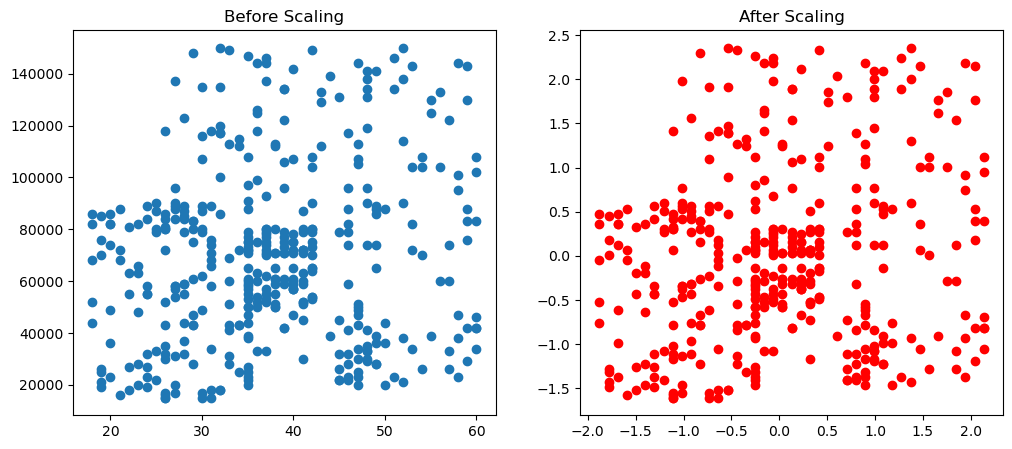

In [101]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [102]:
# doing all this code,we just changed the scale or absolute positionng of data on the x-y axis to easily compare columns with distinct values on a same scale. but there is no change in relative positiong or distribution.

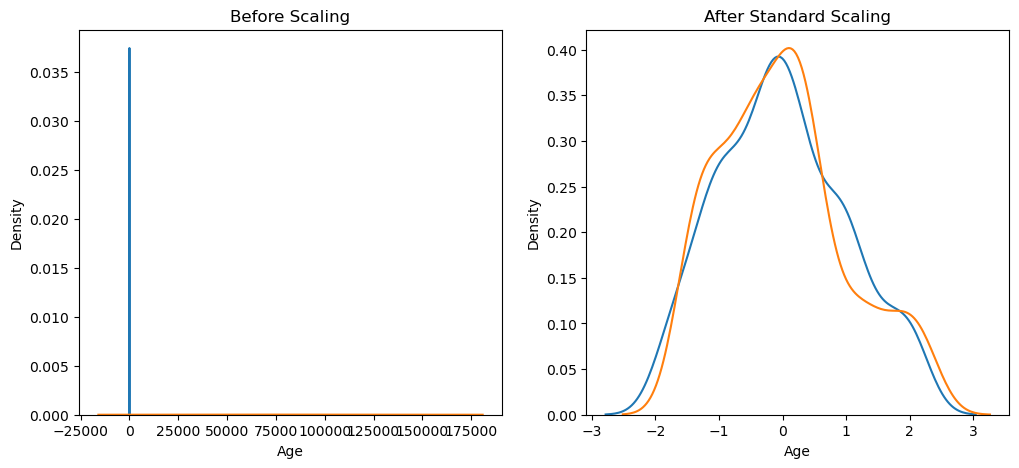

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

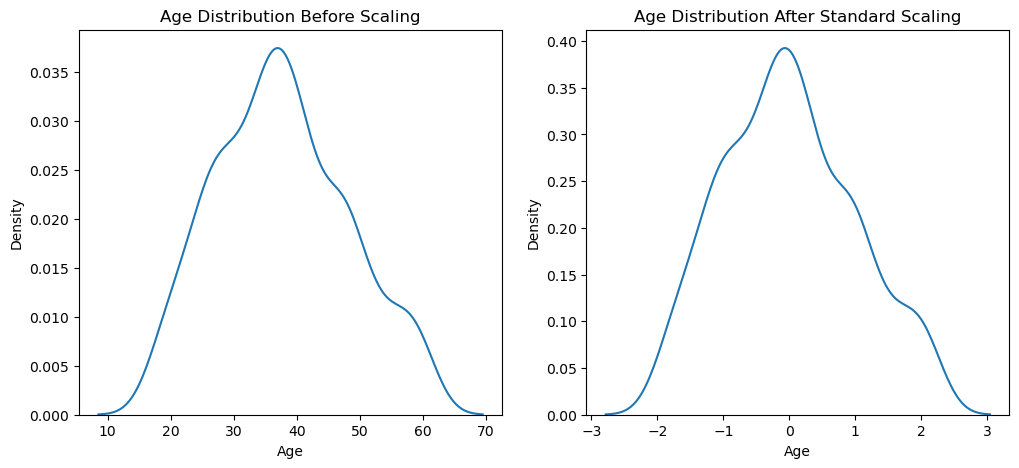

In [105]:

#Comparison of Distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

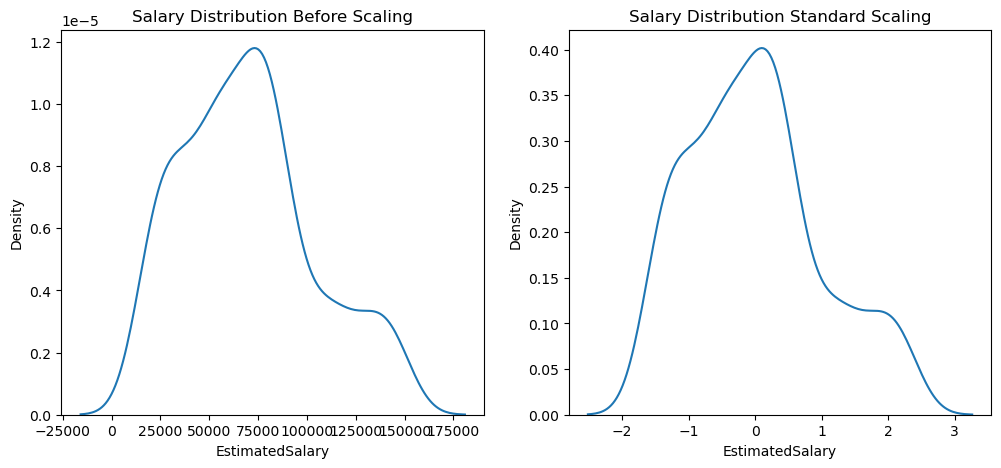

In [106]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()